In [59]:
import numpy as np
import seaborn as sb
import plotly.graph_objects as go

In [60]:
# Input image
image = np.zeros(shape=(10,10,3))
color = np.zeros(shape=(10,10,3,3)) # just an array same size as image with rgb colors (for plotting)

# Red pixel coordinates
reds = [ (5,5), (4,5), (3,5), (2,5), (1,5), (1,6), (1,7), (1,8) ]
# Green pixel coordinates
greens = [ (7,7), (8,7), (9,7), (9,8), (9,9) ]
# Blue pixel coordinates
blues = [ (6,6), (7,6), (8,6), (9,6), (5,5), (5,4), (5,3), (5,2), (5,1), (5,0) ]

# Fill in the image 3d array (and the color array - just used for visualization)
for x,y in reds:
    image[x,y,0] = 1 # Fill in pixel
    color[x,y,0,0] = 1 # Set color 0 (red) to 1
    
for x,y in greens:
    image[x,y,1] = 1 # Fill in pixel
    color[x,y,1,1] = 1 # Set color 1 (green) to 1    
    
for x,y in blues:
    image[x,y,2] = 1 # Fill in pixel
    color[x,y,2,2] = 1 # Set color 2 (blue) to 1 


# The output feature map we will compute 
# (it has a depth of 1, because the filter take all input channels and produces 1 output)
fmap = np.zeros(shape=(10,10))

# The filter is a vertical line detector
# -1 1 -1
# -1 1 -1
# -1 1 -1
# Because it is is high when a vertical line in middle is bright and the sides are dark
# And it will have the same on each channel, don't care what color the line is
f = np.zeros(shape=(3,3,3))
for z in range(3):
    f[:,:,z] = np.array([[-1,1,-1],
                         [-1,1,-1],
                         [-1,1,-1]])

fsize = 3 # Indicate this is a 3x3 filter

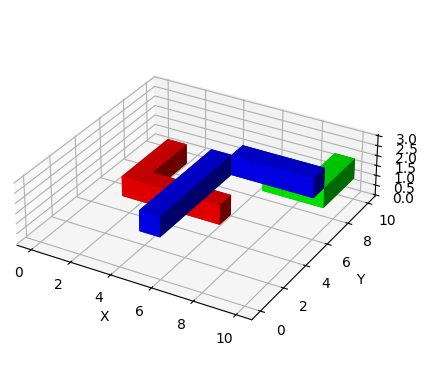

In [61]:
# Visualize the image
X, Y, Z = np.indices((11, 11, 4))

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(X, Y, Z, image,
          facecolors=color,
          #edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='X', ylabel='Y', zlabel='Z')
ax.set_aspect('equal')

plt.show()

In [62]:
# Convolve the filter over the image, use padding (assume edges are 0, just don't compute if over edge)
# For each position of the filter
for i in range(10):
    for j in range(10):
            # The filter is centered a i,j
            dp = 0 # The dot-product sum we compute
            # Compute dot-product with all overlapping pixels
            # To cover all overlapping pixels
            # A 3x3 filter will go through offsets of -1 to 1 for both x, y dimensions
            # To handle general filter sizes we go from -floor(filtersize / 2) to floor(filtersize / 2)
            P = int(fsize/2) # just use P to hold this value
            # For all x,y coordinates of the filter
            for x in range(fsize): # Rows of filter
                for y in range(fsize): # Columns of the filter
                    # The overlapping pixel
                    x_coord = i + x - P # P is to shift the filter up and left, so the center of the filter is on the pixel
                    y_coord = j + y - P
                    # If within bounds
                    if (x_coord >= 0) and (x_coord < 10) and (y_coord >= 0) and (y_coord < 10):
                        # For all depths (channels)
                        for z in range(3):
                            dp += f[x][y][z] * image[x_coord][y_coord][z]
            # Here is where we  do a non-linear function on the dot-product
            # Doing ReLu (negative values get set to 0)
            dp = max(0.0, dp)
            
            fmap[i][j] = dp

<Axes: >

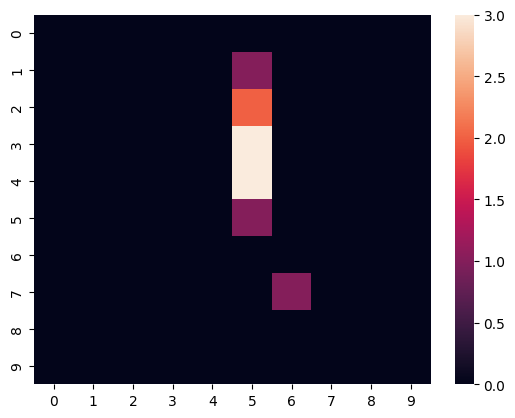

In [63]:
# Visualize feature map
sb.heatmap(fmap)
# Notice it is only high where there is a single vertical line in the original image

In [64]:
f[:,:,1]

array([[-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.]])